In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

sns.set(style='white')

In [2]:
data = pd.read_csv('../dataset/csv/churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [3]:
data.shape

(28382, 21)

In [4]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [5]:
data.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [6]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [7]:
data.index

RangeIndex(start=0, stop=28382, step=1)

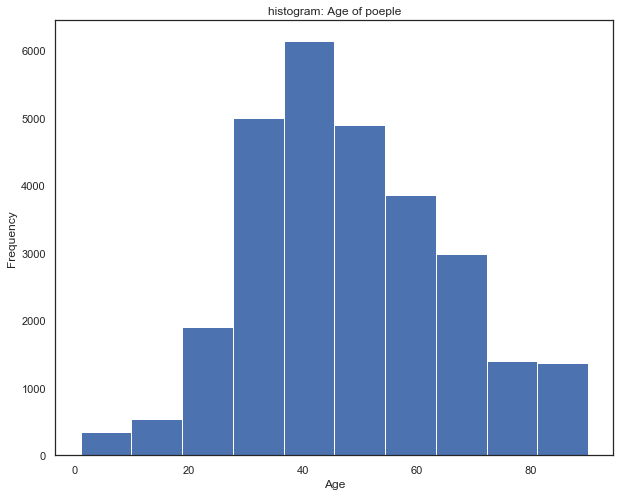

In [17]:
plt.figure(figsize=(10, 8))
plt.hist(data.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('histogram: Age of poeple')
plt.show()

In [15]:
mean = data['age'].mean()
median = data['age'].median()
stdev = mean - data['age'].std(), mean + data['age'].std()
mean, median, stdev

(48.208336269466564, 46.0, (30.401172896500047, 66.01549964243308))

Text(0.5, 1.0, 'KDE Plot with descriptives: Age of people who churned')

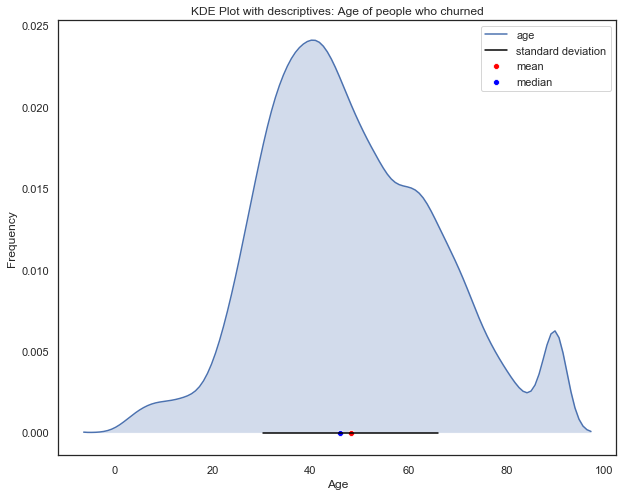

In [16]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data['age'], shade=True)
sns.scatterplot(mean, [0], color='red', label='mean')
sns.scatterplot(median, [0], color='blue', label='median')

sns.lineplot(stdev, [0,0], color='black', label='standard deviation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('KDE Plot with descriptives: Age of people')

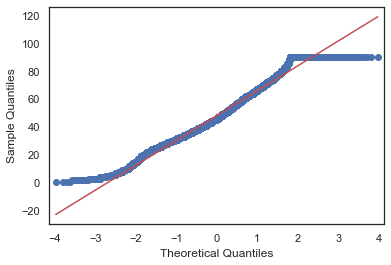

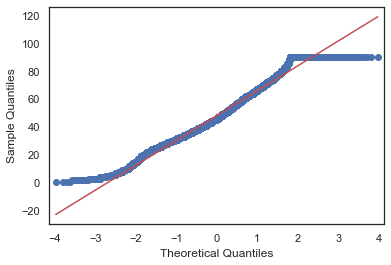

In [19]:
sm.qqplot(data['age'], line='s')

In [20]:
data['age'].skew()

0.33058929557517264

In [21]:
data['age'].kurtosis()

-0.16866785691275865

In [22]:
v_mean = data['vintage'].mean()
v_median = data['vintage'].median()
v_mode = data['vintage'].mode()
v_mean, v_median, v_mode

(2091.1441054189277,
 2154.0,
 0    2251
 1    2260
 dtype: int64)

In [23]:
print(data[data['vintage']==2251].shape)
print(data[data['vintage']==2260].shape)

(69, 21)
(69, 21)


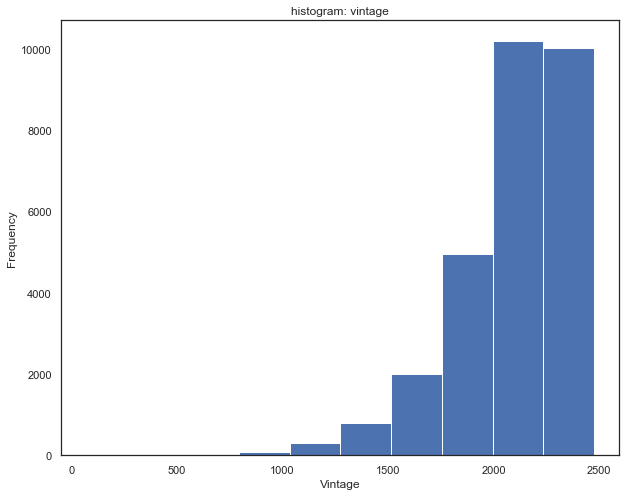

In [24]:
plt.figure(figsize=(10, 8))
plt.hist(data['vintage'])
plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.title('histogram: vintage')
plt.show()

Text(0.5, 1.0, 'KDE plot with descriptivess: Vintage of Customers')

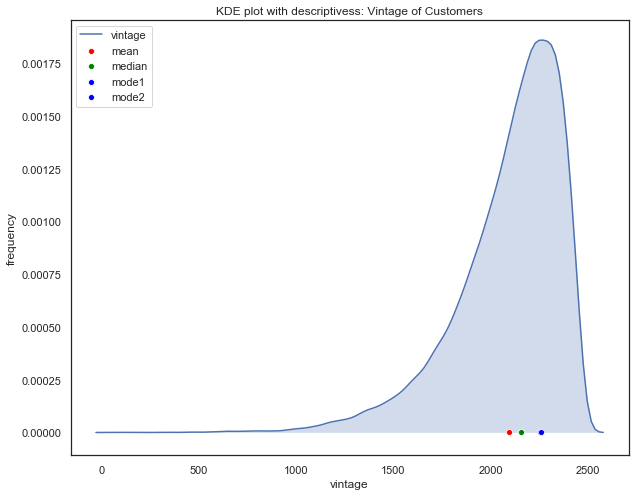

In [29]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data['vintage'], shade=True)
sns.scatterplot(v_mean, [0], color='red', label='mean')
sns.scatterplot(v_median, [0], color='green', label='median')
sns.scatterplot(v_mode[0], [0], color='blue', label='mode1')
sns.scatterplot(v_mode[1], [0], color='blue', label='mode2')

plt.xlabel('vintage')
plt.ylabel('frequency')
plt.title('KDE plot with descriptivess: Vintage of Customers')

In [30]:
data['vintage'].skew()

-1.3889357082821185

In [32]:
data['vintage'].kurtosis()

2.7234245375227926

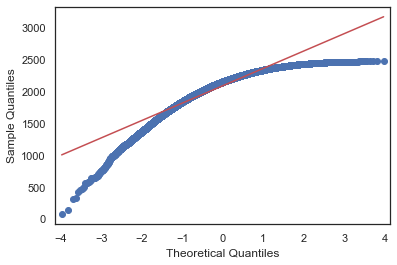

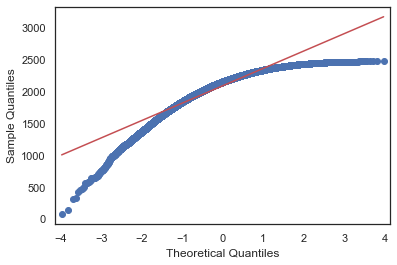

In [33]:
sm.qqplot(data['vintage'], line='s')

In [42]:
values = [*range(1, 56)]
print(values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]


In [39]:
values.median()

AttributeError: 'list' object has no attribute 'median'